In [89]:
import os
import pandas as pd

def load_dataframes(directory):
    # 파일명만 추출
    files = [f for f in os.listdir(directory) if os.path.isfile(os.path.join(directory, f))]

    dataframes = {}  # 각 데이터프레임을 저장할 딕셔너리
    # print(files[:3])
    for file in files:
        if file.endswith('.csv'):  # csv 파일만 처리
            filepath = os.path.join(directory, file)  # 절대경로 생성
            df = pd.read_csv(filepath, encoding='cp949')  # 데이터프레임으로 로드
            target = df[['년','월','일','시간']].astype(str)
            target = target['년']+ '-' + target['월']+ '-' + target['일']+ '-' + target['시간']
            df['date'] = pd.to_datetime(target, format = "%Y-%m-%d-%H")
            df.drop(['Unnamed: 0','년','월','일','시간'], inplace=True, axis=1)
            df = df.set_index("date", drop=True)
            dataframes[file[:3]] = df  # 딕셔너리에 저장

    return dataframes

folder_path = './sun_gen/측정기반 TMY(강릉, 서울, 대전, 대구, 제주)'  # 실제 경로로 변경해야 합니다.
df_dict = load_dataframes(folder_path)

# 결과 확인
for name, df in df_dict.items():
    print(f"File: {name}")
    print(df.head())  # 각 데이터프레임의 처음 5개 행 출력


File: 101
                     건구온도 (℃)  건구온도_불확도 (℃)  이슬점온도 (℃)  이슬점온도_불확도 (℃)  \
date                                                                    
2008-01-01 00:00:00     -10.5           0.3      -10.5            0.2   
2008-01-01 01:00:00     -11.0           0.3      -11.0            0.2   
2008-01-01 02:00:00     -11.6           0.3      -11.6            0.2   
2008-01-01 03:00:00     -12.2           0.3      -12.2            0.2   
2008-01-01 04:00:00     -13.5           0.3      -13.5            0.2   

                     상대습도 (%)  상대습도_불확도 (%)  표면기압 (hPa)  표면기압_불확도 (hPa)  \
date                                                                      
2008-01-01 00:00:00      67.0           2.0      1008.4             0.5   
2008-01-01 01:00:00      69.0           2.1      1008.5             0.5   
2008-01-01 02:00:00      85.0           2.6      1008.6             0.5   
2008-01-01 03:00:00      86.0           2.6      1008.7             0.5   
2008-01-01 04:00:00      88.

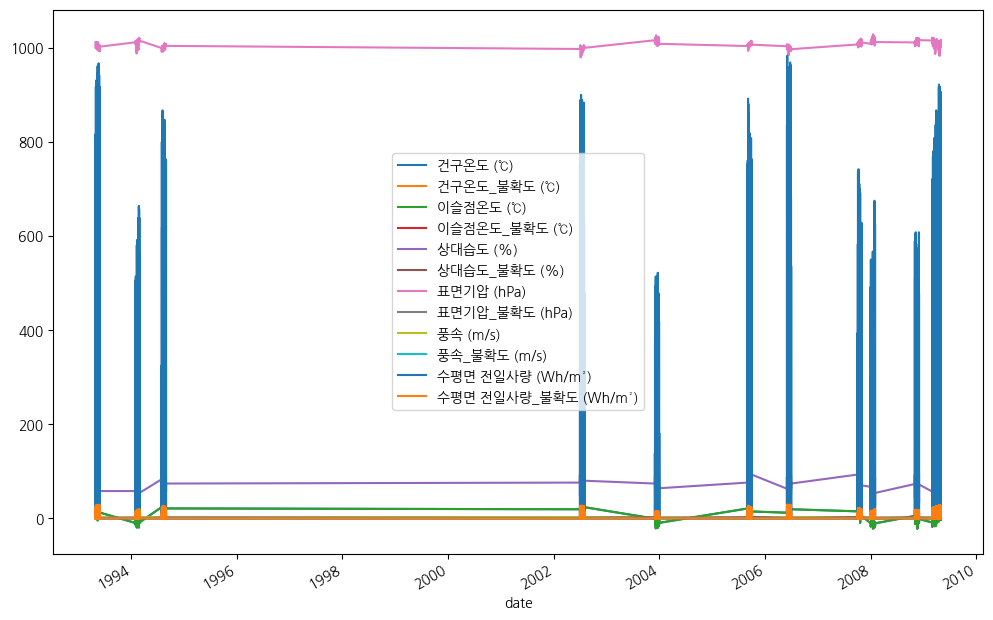

In [98]:
df_dict["101"].plot(figsize = (12,8));

In [108]:
for idx, value in enumerate(df_dict):
    print(df_dict[value].isna().sum().sum())

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [110]:
for idx, value in enumerate(df_dict):
    print(len(df_dict[value]))

8760
8760
8760
8760
8760
8760
8760
8760
8760
8760
8760
8760
8760
8760
8760
8760


In [96]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8760 entries, 2008-01-01 00:00:00 to 2003-12-31 23:00:00
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   건구온도 (℃)              8760 non-null   float64
 1   건구온도_불확도 (℃)          8760 non-null   float64
 2   이슬점온도 (℃)             8760 non-null   float64
 3   이슬점온도_불확도 (℃)         8760 non-null   float64
 4   상대습도 (%)              8760 non-null   float64
 5   상대습도_불확도 (%)          8760 non-null   float64
 6   표면기압 (hPa)            8760 non-null   float64
 7   표면기압_불확도 (hPa)        8760 non-null   float64
 8   풍속 (m/s)              8760 non-null   float64
 9   풍속_불확도 (m/s)          8760 non-null   float64
 10  수평면 전일사량 (Wh/m²)      8760 non-null   float64
 11  수평면 전일사량_불확도 (Wh/m²)  8760 non-null   float64
dtypes: float64(12)
memory usage: 889.7 KB


In [97]:
df1.describe()

,건구온도 (℃),건구온도_불확도 (℃),이슬점온도 (℃),이슬점온도_불확도 (℃),상대습도 (%),상대습도_불확도 (%),표면기압 (hPa),표면기압_불확도 (hPa),풍속 (m/s),풍속_불확도 (m/s),수평면 전일사량 (Wh/m²),수평면 전일사량_불확도 (Wh/m²)
count,8760.000000,8.760000e+03,8760.000000,8.760000e+03,8760.000000,8760.000000,8760.000000,8760.0,8760.000000,8760.000000,8760.000000,8760.000000
mean,5.415571,3.000000e-01,5.415571,2.000000e-01,69.503881,2.082317,1007.110582,0.5,1.097523,0.352660,152.885845,4.586838
std,11.947954,1.515541e-14,11.947954,2.981119e-14,21.553513,0.646800,7.973128,0.0,1.068718,0.341253,235.022871,7.050848
min,-22.200000,3.000000e-01,-22.200000,2.000000e-01,12.000000,0.400000,979.600000,0.5,0.000000,0.000000,0.000000,0.000000
25%,-5.000000,3.000000e-01,-5.000000,2.000000e-01,53.000000,1.600000,1001.700000,0.5,0.200000,0.100000,0.000000,0.000000
50%,6.700000,3.000000e-01,6.700000,2.000000e-01,75.000000,2.200000,1007.600000,0.5,0.800000,0.300000,0.000000,0.000000
75%,15.400000,3.000000e-01,15.400000,2.000000e-01,88.000000,2.600000,1013.000000,0.5,1.700000,0.500000,244.750000,7.325000
max,26.200000,3.000000e-01,26.200000,2.000000e-01,98.000000,2.900000,1028.800000,0.5,7.300000,2.300000,983.000000,29.500000
